In [2]:
# Predicting Backorders in Inventory Mangement Context. Original dataset from Kaggle's "Can You Predict Product Backorders?",
# available on https://www.kaggle.com/tiredgeek/predict-bo-trial.

# The code for this project is divided into 3 sections as the processign files are bit huge in size.

#@author: Sabbella Prasanna

print(__doc__)

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
#from sklearn.preprocessing import Imputer
#from sklearn.impute import Imputer
from sklearn.impute import SimpleImputer

#Model related library functions
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy import stats as st
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve





Automatically created module for IPython interactive environment


In [4]:
# Loading the files
cols=range(0,23)
train = pd.read_csv('Kaggle_Training_Dataset_v2.csv', usecols=cols)
test = pd.read_csv('Kaggle_Test_Dataset.csv', usecols=cols)

masterData = train.append(test)
print("masterData shape:",masterData.shape)

masterData shape: (1929937, 23)


In [3]:
masterData.head(10)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No
6,1044643,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
8,1045815,140.0,NaN,0.0,15.0,114.0,152.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No


In [4]:
masterData.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.929935e+06,1.814318e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06
mean,4.965683e+02,7.878627e+00,4.306440e+01,1.785399e+02,3.454659e+02,5.066067e+02,5.536816e+01,1.746639e+02,3.415653e+02,5.235771e+02,5.277637e+01,2.016193e+00,-6.899870e+00,-6.462343e+00,6.537039e-01
std,2.957343e+04,7.054212e+00,1.295420e+03,5.108770e+03,9.831562e+03,1.434543e+04,1.884377e+03,5.188856e+03,9.585030e+03,1.473327e+04,1.257968e+03,2.296112e+02,2.659988e+01,2.588343e+01,3.543230e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [17]:
def process(raw_file):
    # The following are strategies adopted to sanitize the raw data:
    #1.0 Binaries are converted from strings ('Yes' and 'No') to 1 and 0.
    #2.0 The attributes related to quantities are normalized(std dev equal to 1) per row. Thereby, with the normalization,
    # the orders with different magnitudes are approximated.
    #Missing values for lead tims and perf month average are replaced using the series median and mean by leverage the usage of
    #Impute library function in sklearn.
    
    #Impute the missing values with the median and rest with NA drop them
    imputer = SimpleImputer(missing_values= np.nan, strategy='median')
    raw_file['lead_time'] = imputer.fit_transform(raw_file['lead_time'].values.reshape(-1, 1))
    
    raw_file = raw_file.dropna()
    imp = SimpleImputer(missing_values = -99, strategy = 'median')
    for col in ['perf_6_month_avg', 'perf_12_month_avg']:
        raw_file[col] = imp.fit_transform(raw_file[col].values.reshape(-1, 1))
        
    #converting to binaries
    for col in ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
               'stop_auto_buy', 'rev_stop', 'went_on_backorder']:
        raw_file[col] = (raw_file[col] == 'Yes').astype(int)
        
    #Normalization
    from sklearn.preprocessing import normalize
    quantifiable_fields = ['national_inv', 'in_transit_qty', 'forecast_3_month',
                          'forecast_6_month', 'forecast_9_month', 'min_bank',
                          'local_bo_qty', 'pieces_past_due', 'sales_1_month', 
                          'sales_3_month', 'sales_6_month', 'sales_9_month']
    raw_file[quantifiable_fields] = normalize(raw_file[quantifiable_fields], axis = 1)
    return raw_file

processed_master_data = process(masterData)

processed_master_data.head(50)
    

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.000000,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.85,0.83,0.0,0,0,0,1,0,0
1,1043384,1.000000,9.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,1043696,1.000000,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.85,0.83,0.0,1,0,0,1,0,0
3,1043852,0.989949,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,1044048,0.872872,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.85,0.83,0.0,1,0,0,1,0,0
5,1044198,1.000000,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.82,0.87,0.0,0,0,0,1,0,0
6,1044643,0.999993,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.85,0.83,0.0,1,0,0,1,0,0
7,1045098,1.000000,2.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00,0.00,0.0,1,0,1,1,0,0
8,1045815,0.592005,8.0,0.0,0.063429,0.482061,0.642748,0.000000,0.000000,0.000000,...,0.0,0.85,0.83,0.0,0,0,0,1,0,0
9,1045867,1.000000,8.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.82,0.87,0.0,0,0,0,1,0,0


Explained variance ratio: 34.32%
[0.2342628  0.10890335]


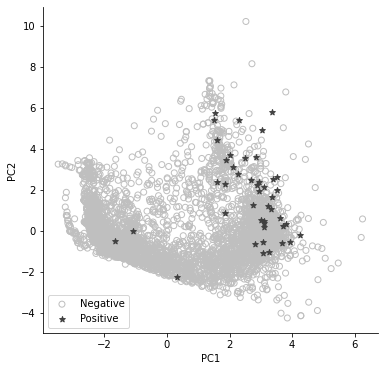

In [6]:
#Giving the general interpretation of the dataset through 2d plots using PCA.

def plot_2d(X, y, title=''):
    """
    Plot the two major components using PCA, giving a general interpretation of
    the dataset.
    """
    from sklearn.preprocessing import StandardScaler
    X_std = StandardScaler().fit_transform(X)

    from sklearn.decomposition import PCA
    dec = PCA(n_components=2)
    X_reduced = dec.fit_transform(X_std)
    
    f, ax = plt.subplots(figsize=(6,6))
    ax.scatter(X_reduced[y==0,0], X_reduced[y==0,1], 
               facecolors='none', edgecolors='0.75', label="Negative")
    ax.scatter(X_reduced[y==1,0], X_reduced[y==1,1], c='0.25', marker='*', 
               label='Positive')
    ax.legend(loc='lower left')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    print ("Explained variance ratio: %.2f%%" % 
           (100*dec.explained_variance_ratio_.sum()))
    print (dec.explained_variance_ratio_)
    #plt.savefig('img/plot2d.jpeg',format='jpeg',bbox_inches='tight',dpi=450)
    plt.show()
    
sample = processed_master_data.sample(5000, random_state = 36)
x_sample = sample.drop('went_on_backorder', axis = 1).values
y_sample = sample['went_on_backorder'].values

plot_2d(x_sample, y_sample)

In [18]:
#Prepare the data for the modeling
X = pd.DataFrame(processed_master_data.columns)
X = processed_master_data[processed_master_data.columns]
y = processed_master_data['went_on_backorder']
X.shape, y.shape

((1929935, 23), (1929935,))

In [19]:
#get the 30% sample data for model explorations
X_sample, X_data, y_sample, y_data = train_test_split(X, y, test_size = 0.99, random_state = 42)
X_sample.shape, y_sample.shape, X_data.shape, y_data.shape

((19299, 23), (19299,), (1910636, 23), (1910636,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.10, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17369, 23), (1930, 23), (17369,), (1930,))

# Train KNN model with default parameters on 30% sample data

In [21]:
#KNN
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_jobs = -1))]

#Create the pipeline:pipeline
pipeline_knn = Pipeline(steps)

#Fit to the training set
pipeline_knn.fit(X_train, y_train)
knn_prediction = pipeline_knn.predict(X_test)
#getting the classification report
knn_report = classification_report(y_test, knn_prediction)
#print the report
print(knn_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1915
           1       1.00      1.00      1.00        15

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



Train SVM model with default parameters on 30% sample data


In [22]:
#Train default SVC on the data and getting the basic results
steps = [('scaler', StandardScaler()),
        ('svc', svm.SVC(class_weight = 'balanced'))]

#Create the pipeline : pipeline
pipeline_svc = Pipeline(steps)

#Fit to the training set
pipeline_svc.fit(X_train, y_train)
svc_prediction = pipeline_svc.predict(X_test)

#get the classification report
svc_report = classification_report(y_test, svc_prediction)

#print the report
print(svc_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1915
           1       1.00      1.00      1.00        15

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



Train LogisticRegression model with default parameters on 30% data

In [ ]:
#Train the deault LogisticRegression model
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression(class_weight = 'balanced'))]

#Create the pipeline : pipeline
pipeline_logreg = Pipeline(steps)

#Fit to the training set
pipeline_logreg.fit(X_train, y_train)
logreg_prediction = pipeline_logreg.predict(X_test)

#get the classification report
logreg_report = classification_report(y_test, logreg_prediction)

#print the report
print(logreg_report)


Train RandomForest classifier model with default parameters on 30% data

In [ ]:
#Train the default RandomForest classifier model
rfmodel = RandomForestClassifier(random_state = 32)
#Fit to the training set
rfmodel.fit(X_train, y_train)
rfmodel_prediction = rfmodel.predict(X_test)
#get the classification report
rfmodel_report = classification_report(y_test, rfmodel_prediction)
#print the report
print(rfmodel_report)

Train GradientBoostingClassifier model with default paramatars on 10% data

In [ ]:
#Train the dataset with Gradient Boosting
gbmodel = GradientBoostingClassifier(random_state = 32)
#Fit to the training set
gbmodel.fit(X_train, y_train)
gbmodel_prediction = gbmodel.predict(X_test)
#get the classification report
gbmodel_report = classification_report(y_test, gbmodel_prediction)
#print the report
print(gbmodel_report)


Train AdaBoostClassifier with randomforest estimator


In [ ]:
#Train default on 10% data set with Adaboost
abmodel = AdaboostClassifier(random_state =32)
#Fit the training set
abmodel.fit(X_train, y_train)
abmodel_prediction = abmodel.predict(X_test)
#get the classification report
abmodel_report = classfication_report(y_test,abmodel_prediction)
#print the report
print(abmodel_report)

In [ ]:
abmodel_rf = AdaBoostClassifier(base_estimator  = rfmodel, random_state = 32)
#Fit the training model
abmodel_rf.fit(X_train, y_train)
abmodel_prediction_rf = abmodel_rf.predict(X_test)
#get the classification report
abmodel_report_rf = classification_report(y_test, abmodel_prediction_rf)
#print the report
print(abmodel_report_rf)

In [ ]:
#Plot the ROC Curves
fig, ax1 = plt.subplot(figsize = (9,9))
plt.plot([0, 1], [0, 1], 'k--')
estimators = [pipeline_knn, pipeline_logreg, rfmodel, gbmodel, abmodel]
classifiers = ['KNN', 'LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier',
              'AdaBoostClassifier']
colors = ['b', 'g', 'r', 'c', 'm']
for i, estimator in enumerate(estimators):
    y_pred_prob = estimator.predict_proba(X_test)[:,1]
    fpr,tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label = classifiers[i], colors = colors[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Negative Rate')
plt.legend(loc = 4)
plt.title('ROC Curve')